<a href="https://colab.research.google.com/github/Maryam-Zubair/Data-Science/blob/main/EnsembleModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd

### 1. Voting Classifier

- Import `LogisticRegression`, `DecisionTreeClassifier`, `VotingClassifier` classes
- Import `make_moons` function from `sklearn.datasets`
- Split data into test and train datasets
- Create a voting classifier using logistic regressor and a tree classifier. Use soft voting.
- Print the scores for ensembeled model, logistic regressor and the decision tree.
- If you like, you can show the decision boundaries on a contour plot

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.2, random_state=18)

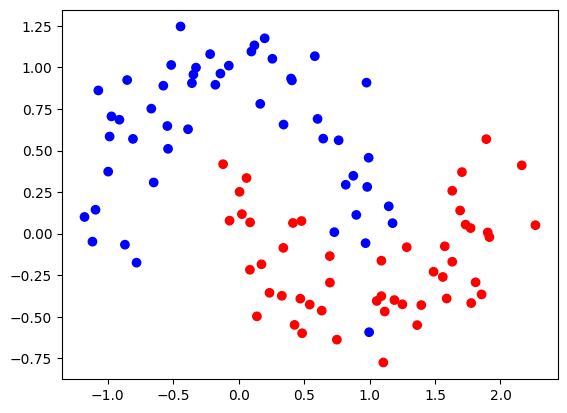

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
lr = LogisticRegression(C=100)
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
voting= VotingClassifier([('logreg', lr), ('tree', dt)], voting='soft', flatten_transform=False)

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(C=100)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=0))],
                 flatten_transform=False, voting='soft')

In [ ]:
logreg, tree = voting.estimators_

In [ ]:
print(f"{logreg.score(X_test, y_test):.2f}")

0.84


In [ ]:
print(f"{tree.score(X_test, y_test):.2f}")
print(f"{voting.score(X_test, y_test):.2f}")

0.80
0.88


In [ ]:
logreg.coef_

array([[ 1.142, -4.554]])

In [ ]:
from sklearn.tree import plot_tree

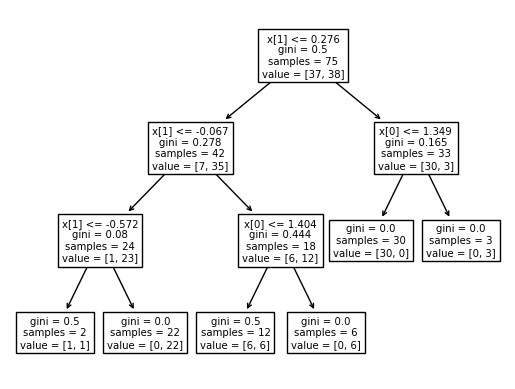

In [ ]:
plot_tree(tree);

### 2.  Random Forests

### 2.1
- Import `RandomForestClassifier`
- Import `load_digits`
- Split fdata into train and test datasets
- Start a random forest model with `warm_start=True`
- Train the model for different number of estimators from 1 to 100 in steps of 5 in a loop
- Store train and test scores for each estimator and plot

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
X, y = digits.data, digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
train_score=[]
test_score=[]

In [ ]:
rf = RandomForestClassifier(warm_start=True)
estimator_range = np.arange(1, 200, 10)

In [ ]:
for n_est in estimator_range:
  rf.n_estimators=n_est
  rf.fit(X_train, y_train)
  train_score.append(rf.score(X_train, y_train))
  test_score.append(rf.score(X_test, y_test))

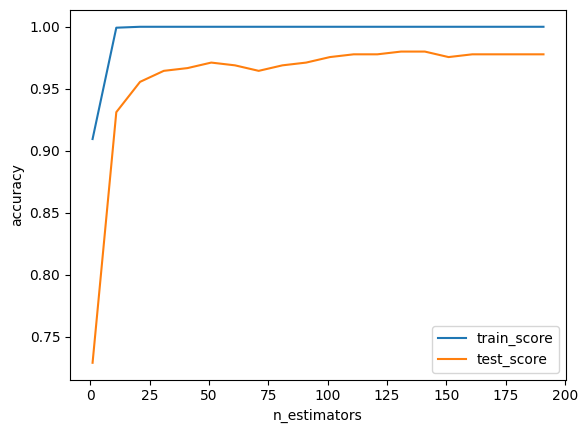

In [ ]:
plt.plot(estimator_range, train_score, label='train_score')
plt.plot(estimator_range, test_score, label='test_score')
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

### 2.2
- Import `RandomForestClassifier`
- Import `load_digits`
- Split fdata into train and test datasets
- Train the random forest model for different number of `max_features` from 1 to 60 in steps of 5 in a loop
- Set `n_estimators=200` and `oob_score=True`
- Store train, test, and oob scores for each estimator and plot

In [ ]:
X_train.shape

(1347, 64)

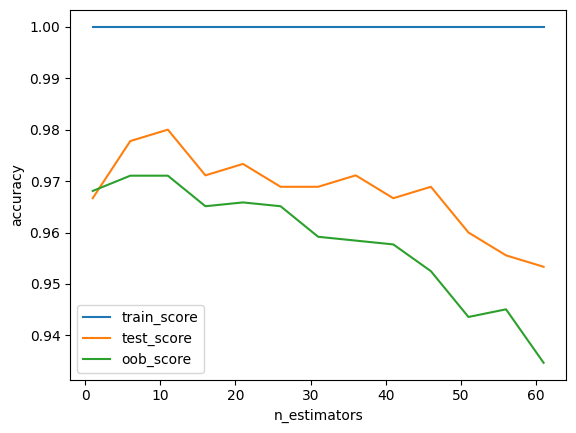

In [ ]:
train_score=[]
test_score=[]
oob_score = []

feature_range = np.arange(1, 64, 5)

for mf in feature_range:
  rf = RandomForestClassifier(max_features = mf, oob_score=True, n_estimators=200, random_state=0)

  rf.fit(X_train, y_train)
  train_score.append(rf.score(X_train, y_train))
  test_score.append(rf.score(X_test, y_test))
  oob_score.append(rf.oob_score_)

plt.plot(feature_range, train_score, label='train_score')
plt.plot(feature_range, test_score, label='test_score')
plt.plot(feature_range, oob_score, label='oob_score')
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [ ]:
0.33 * 0.75

0.2475

In [ ]:
np.array(test_score) - np.array(oob_score)

array([-0.001,  0.007,  0.009,  0.006,  0.007,  0.004,  0.01 ,  0.013,
        0.009,  0.016,  0.016,  0.01 ,  0.019])

### 2.3
- Import `RandomForestClassifier`
- Import `load_iris`
- Split fdata into train and test datasets
- Train a random forest model for `n_estimators=100`
- Print the geature importance values
- Create a bar plot for the feature importances